In [1]:
import sys
import os
sys.path.append(os.path.abspath("src"))

In [2]:
import subprocess

#ollama serverを起動
serve_proc = subprocess.Popen(["ollama", "serve"])

In [3]:
import subprocess
from collections import deque

#モデルのダウンロード
#!curl -L -o cyberagent-DeepSeek-R1-Distill-Qwen-32B-Japanese-Q4_K_M.gguf "https://huggingface.co/mmnga/cyberagent-DeepSeek-R1-Distill-Qwen-32B-Japanese-gguf/resolve/main/cyberagent-DeepSeek-R1-Distill-Qwen-32B-Japanese-Q4_K_M.gguf?download=true"

#モデルファイルの作成
modelfile= '''
FROM ./cyberagent-DeepSeek-R1-Distill-Qwen-32B-Japanese-Q4_K_M.gguf
TEMPLATE """{{- if .System }}{{ .System }}{{ end }}
{{- range $i, $_ := .Messages }}
{{- $last := eq (len (slice $.Messages $i)) 1}}
{{- if eq .Role "user" }}<｜User｜>{{ .Content }}
{{- else if eq .Role "assistant" }}<｜Assistant｜>{{ .Content }}{{- if not $last }}<｜end▁of▁sentence｜>{{- end }}
{{- end }}
{{- if and $last (ne .Role "assistant") }}<｜Assistant｜>{{- end }}
{{- end }}"""
PARAMETER stop <｜begin▁of▁sentence｜>
PARAMETER stop <｜end▁of▁sentence｜>
PARAMETER stop <｜User｜>
PARAMETER stop <｜Assistant｜>
'''

with open("Modelfile", "w", encoding="utf-8") as f:
    f.write(modelfile)

#Ollamaにモデルを登録
proc = subprocess.Popen(
    ["ollama", "create", "deepseek-ca", "-f", "Modelfile"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.PIPE,
    text=True
)

# エラーログの表示
lines = deque(proc.stderr, maxlen=5)
proc.wait()
print("\n".join(lines))

Error: listen tcp 127.0.0.1:11434: bind: address already in use


using existing layer sha256:369ca498f347f710d068cbb38bf0b8692dd3fa30f30ca2ff755e211c94768150 

using existing layer sha256:f4d24e9138dd4603380add165d2b0d970bef471fac194b436ebd50e6147c6588 

using existing layer sha256:8facd8c42732b38b6d09c6fbb77fca96dc06d679839899e3aab9033c5513cecb 

writing manifest 

success 



In [4]:
#モデルのダウンロード
#!curl -L -o tokyotech-llm-Llama-3.1-Swallow-8B-Instruct-v0.1-Q4_K_M.gguf "https://huggingface.co/mmnga/tokyotech-llm-Llama-3.1-Swallow-8B-Instruct-v0.1-gguf/resolve/main/tokyotech-llm-Llama-3.1-Swallow-8B-Instruct-v0.1-Q4_K_M.gguf?download=true"

#モデルファイルの作成
modelfile='''
FROM ./tokyotech-llm-Llama-3.1-Swallow-8B-Instruct-v0.1-Q4_K_M.gguf
TEMPLATE """{{ if .System }}<|start_header_id|>system<|end_header_id|>

{{ .System }}<|eot_id|>{{ end }}{{ if .Prompt }}<|start_header_id|>user<|end_header_id|>

{{ .Prompt }}<|eot_id|>{{ end }}<|start_header_id|>assistant<|end_header_id|>

{{ .Response }}<|eot_id|>"""
PARAMETER stop "<|start_header_id|>"
PARAMETER stop "<|end_header_id|>"
PARAMETER stop "<|eot_id|>"
PARAMETER stop "<|reserved_special_token"
'''

with open("Modelfile", "w", encoding="utf-8") as f:
    f.write(modelfile)

#Ollamaにモデルを登録
proc = subprocess.Popen(
    ["ollama", "create", "swallow31", "-f", "Modelfile"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.PIPE,
    text=True
)

#エラーログの表示
lines = deque(proc.stderr, maxlen=5)
proc.wait()
print("\n".join(lines))

using existing layer sha256:8ab4849b038cf0abc5b1c9b8ee1443dca6b93a045c2272180d985126eb40bf6f 

using existing layer sha256:c0aac7c7f00d8a81a8ef397cd78664957fbe0e09f87b08bc7afa8d627a8da87f 

using existing layer sha256:82522f35c6aaa1676d9c6e0f623796d8d26c01496f2356d84c77dca201df7ec8 

writing manifest 

success 



In [5]:
#モデル一覧
models = [
    "hhao/qwen2.5-coder-tools:32b",
    "swallow31",
    "deepseek-ca"
]

processes = []
logs = {}

# モデルを順に起動
for model in models:
    proc = subprocess.Popen(
        ["ollama", "run", model],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.PIPE,
        text=True
    )
    processes.append((model, proc))

#エラーログの収集
for model, proc in processes:
    stderr_lines = deque(proc.stderr, maxlen=5)
    proc.wait()
    logs[model] = list(stderr_lines)

#ログの表示
for model, log_lines in logs.items():
    print(f"\n{model} log:")
    print("\n".join(log_lines))


hhao/qwen2.5-coder-tools:32b log:
⠋ ⠙ ⠹ ⠼ ⠴ ⠴ ⠦ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠙ ⠹ ⠼ ⠴ ⠴ ⠧ ⠇ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠧ ⠧ ⠇ ⠋ ⠙ ⠹ ⠸ ⠼ ⠼ ⠦ ⠦ ⠧ ⠇ ⠋ ⠋ ⠙ ⠹ ⠼ ⠼ ⠴ ⠦ ⠇ ⠇ ⠋ ⠋ ⠙ ⠹ ⠸ ⠴ ⠦ ⠧ ⠇ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠇ ⠇ ⠋ ⠙ ⠙ ⠸ ⠸ ⠼ ⠴ 

swallow31 log:
⠙ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠧ ⠧ ⠇ ⠏ ⠋ ⠙ ⠸ ⠸ ⠼ ⠴ ⠧ ⠇ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠧ ⠧ ⠇ ⠋ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠧ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ 

deepseek-ca log:
⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠙ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠴ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ ⠹ ⠸ ⠼ ⠼ ⠦ ⠧ ⠇ ⠏ ⠋ ⠙ 


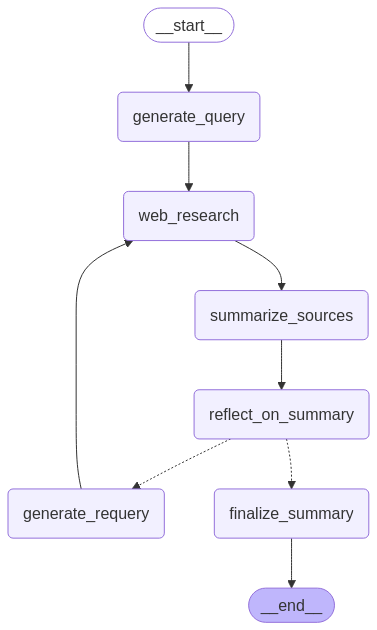

In [6]:
from deep_research.graph import graph
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

#LangGraphワークフローの描画
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [7]:
import os
import sys
from uuid import uuid4
from contextlib import contextmanager
from langchain_core.runnables import RunnableConfig

from deep_research.graph import graph
from deep_research.state import SummaryState
from deep_research.configuration import Configuration

#LangSmithの環境変数設定
unique_id = uuid4().hex[0:8]
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_PROJECT"] = f"project_name - {unique_id}"
os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGSMITH_API_KEY"] = "*****************"
os.environ["TAVILY_API_KEY"] = "*****************"

#ワークフローに渡す設定オブジェクト
def run_research(prompt_text):
    config = Configuration(
        max_web_research_loops=5,
        llm_provider="ollama",
        search_api="tavily",#tavily #duckduckgo #perplexity
        fetch_full_page=True,
        ollama_base_url="http://localhost:11434/",
        strip_thinking_tokens=True
    )

    #ワークフローに渡す質問文
    input_state = SummaryState(
        research_topic=prompt_text,
    )

    runnable_config = RunnableConfig(
        tracing=True,#LangSmithに実行トレースを送信
        configurable=config.model_dump(),#Pydanticモデルを辞書に変換
        recursion_limit=100,#ワークフローのステップ数上限
    )

    #ワークフローを実行
    result = graph.invoke(
        input=input_state,
        config=runnable_config,
        debug=True
    )

    return result["running_summary"]

prompt_text = "NVIDIA HGX B200について教えてください。"
summary_output = run_research(prompt_text)

print("\n--- Research Summary ---\n")
print(summary_output)

[-1:checkpoint] State at the end of step -1:
{'web_research_results': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> SummaryState(research_topic='NVIDIA HGX B200について教えてください。',
             search_query=None,
             web_research_results=[],
             sources_gathered=[],
             research_loop_count=0,
             running_summary=None,
             query_history=[],
             short_query_history=[])
[0:writes] Finished step 0 with writes to 1 channel:
- research_topic -> 'NVIDIA HGX B200について教えてください。'
[0:checkpoint] State at the end of step 0:
{'research_topic': 'NVIDIA HGX B200について教えてください。', 'web_research_results': []}
[1:tasks] Starting 1 task for step 1:
- generate_query -> SummaryState(research_topic='NVIDIA HGX B200について教えてください。',
             search_query=None,
             web_research_results=[],
             sources_gathered=[],
             research_loop_count=0,
             running_summary=None,
             query_history=[],
             short_query